In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv(r'D:\ASD\Autism-Spectrum-Disorder--Medical-Analyisis\datasets 1\Autism_Screening_Data_Combined.csv')
toddler_autism_data = pd.read_csv(r'D:\ASD\Autism-Spectrum-Disorder--Medical-Analyisis\datasets 1\Toddler Autism dataset July 2018.csv')
Q_Chat_10 = pd.read_csv(r'D:\ASD\Autism-Spectrum-Disorder--Medical-Analyisis\datasets 1\Q_Chat_10_Questions.csv')

In [23]:
df_subset = toddler_autism_data.head(60)


In [24]:
features = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']
X = df_subset[features]
y = df_subset['Class/ASD Traits'].apply(lambda x: 1 if x == 'Yes' else 0)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
def get_user_inputs():
    questions = [
        "1. Does your child look at you when you call his/her name?",
        "2. How easy is it for you to get eye contact with your child?",
        "3. Does your child point to indicate that s/he wants something?",
        "4. Does your child point to share interest with you?",
        "5. Does your child pretend?",
        "6. Does your child follow where you’re looking?",
        "7. If someone is visibly upset, does your child show signs of wanting to comfort them?",
        "8. Would you describe your child’s first words as:",
        "9. Does your child use simple gestures?",
        "10. Does your child stare at nothing with no apparent purpose?"
    ]
    
    responses = []
    for i in range(0, len(questions), 3):
        for q in questions[i:i+3]:
            while True:
                response = input(f"{q} (Always/Usually/Sometimes/Rarely/Never): ").strip().capitalize()
                if response in ['Always', 'Usually', 'Sometimes', 'Rarely', 'Never']:
                    responses.append(response)
                    break
                else:
                    print("Invalid response. Please enter one of: Always, Usually, Sometimes, Rarely, Never.")
    return responses

In [28]:
def map_responses_to_binary(responses):
    binary_values = []
    for i, response in enumerate(responses):
        if i == 9:  # For question 10
            if response in ['Always', 'Usually', 'Sometimes']:
                binary_values.append(1)
            else:
                binary_values.append(0)
        else:
            if response in ['Sometimes', 'Rarely', 'Never']:
                binary_values.append(1)
            else:
                binary_values.append(0)
    return binary_values

In [29]:
# Collect user inputs
user_responses = get_user_inputs()

# Map responses to binary values
user_data = map_responses_to_binary(user_responses)

# Predict
prediction = model.predict([user_data])[0]
result = 'Yes' if prediction == 1 else 'No'
print(f"ASD Traits Detected: {result}")

Invalid response. Please enter one of: Always, Usually, Sometimes, Rarely, Never.
ASD Traits Detected: Yes


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


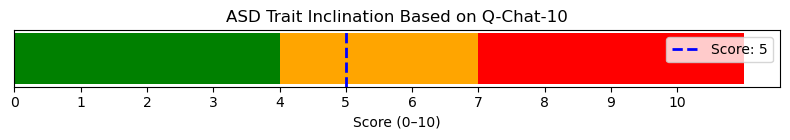


ASD Traits Detected: Yes (Score: 5)


In [30]:
import matplotlib.pyplot as plt

# Count the number of 1's (ASD trait indicators)
asd_score = sum(user_data)

# Plotting
def plot_asd_inclination(score):
    plt.figure(figsize=(8, 1.5))
    colors = ['green' if i <= 3 else 'orange' if i <= 6 else 'red' for i in range(11)]
    for i in range(11):
        plt.barh(0, 1, left=i, color=colors[i])
    plt.axvline(score, color='blue', linestyle='--', linewidth=2, label=f'Score: {score}')
    plt.yticks([])
    plt.xticks(range(0, 11))
    plt.title('ASD Trait Inclination Based on Q-Chat-10')
    plt.xlabel('Score (0–10)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_asd_inclination(asd_score)

# Show prediction
print(f"\nASD Traits Detected: {'Yes' if prediction == 1 else 'No'} (Score: {asd_score})")
